In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

In [84]:
#Create 50 independet MLPs with 1 hidden layer of 10 neurons and 1 output neuron
#seed the random number generator
def MLP_1(x,n,MLP_no):
    '''Compute Output for MLP with 1 hidden layer of 10 neurons and 1 output neuron'''
    #initialize weights
    #seed the random number generator
    np.random.seed(MLP_no+100)
    w21 = np.random.normal(0, 1, (10, 1))
    w10 = np.random.normal(0, n, (10, 1))
    w20 = np.random.uniform(-2, 2, (10, 1))
    
    #Compute input for first hidden layer
    h = w10@x - w20
    #Compute activation for hidden layer
    f_h = np.tanh(h)
    #Compute output
    output = w21.T@f_h
    
    return output

In [94]:

x = np.linspace(-2,2,100).reshape(100,1)

#Add 50 columns for outputs
input_output1 = np.append(x, np.zeros((100,50)), axis=1)
input_output2 = np.append(x, np.zeros((100,50)), axis=1)

for MLP_no in np.arange(start = 1, stop = 51):
    for i in range(len(x)):
        output1 = MLP_1(x[i].reshape(1,1),2, MLP_no)
        output2 = MLP_1(x[i].reshape(1,1),0.5, MLP_no)
        input_output1[i,MLP_no] = output1
        input_output2[i,MLP_no] = output2


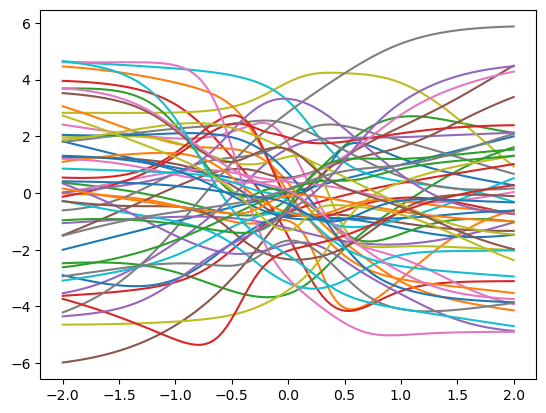

In [95]:
#Plot output of all 50 MLPs with initialization 1
number_of_MLPs = np.shape(input_output1)[1]

for i in np.arange(number_of_MLPs):
    plt.plot(input_output1[:,0], input_output1[:,i])

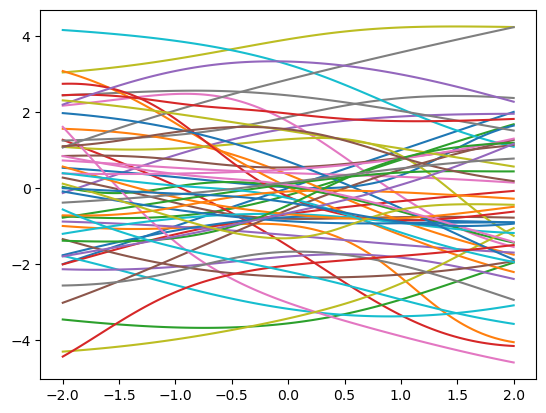

In [96]:
#Plot output of all 50 MLPs with initialization 2
number_of_MLPs = np.shape(input_output2)[1]

for i in np.arange(number_of_MLPs):
    plt.plot(input_output2[:,0], input_output2[:,i])

*Compute the mean squared error (MSE) between each of these 2 × 50 (50 from each of the above two initialization procedures) input-output functions and the function g(x) = −x. For each of the two initialization procedures, which MLP approximates g best? Plot y(x) vs. x for these two MLPs
*

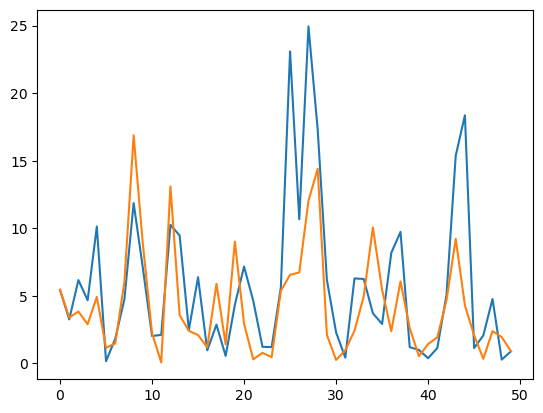

In [98]:
from sklearn.metrics import mean_squared_error

number_of_MLPs = np.shape(input_output1)[1]-1

g_function = x*-1
mse_1 = np.zeros([50,1])
mse_2 = np.zeros([50,1])

for i in np.arange(number_of_MLPs)-1:
    mse_1[i] = mean_squared_error(g_function, input_output1[:,i])
    mse_2[i] = mean_squared_error(g_function, input_output2[:,i])

plt.plot((np.arange(number_of_MLPs)), mse_1)
plt.plot((np.arange(number_of_MLPs)), mse_2)
